# CaptchaNTUT

訓練一卷積神經網路（Convolutional neural network, CNN）模型來辨識北科校園入口網站的登入驗證碼。

## 定義常數

In [1]:
import os

PROJECT_ROOT = 'F:\BDA\pic'

REAL_DATA_PATH = os.path.join(PROJECT_ROOT, 'real_data')
FAKE_DATA_PATH = os.path.join(PROJECT_ROOT, 'fake_data')

## 看看資料的模樣 ─=≡Σ((( つ•̀ω•́)つ

F:\BDA\pic\real_data\AAAK.png
(40, 120, 3)


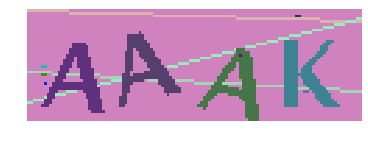

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

# 取得 real_data 中第一張圖片作為範例圖片
sample_image_path = os.path.join(REAL_DATA_PATH, os.listdir(REAL_DATA_PATH)[0])
print(sample_image_path)

# 將範例圖片讀取進來，此時 type 已經是 numpy.ndarray 了
sample_image = mpimg.imread(sample_image_path)

# 透過範例圖片確定資料的 shape，依序為 Rows, Columns, Depth
input_shape = sample_image.shape
if len(input_shape) == 2:
    input_shape = (*input_shape, 1)
print(input_shape)

# 顯示範例圖片
plt.imshow(sample_image)
plt.axis('off')
plt.show()

## 讀取 `real_data` 目錄下的檔案清單

In [4]:
import os  
import pandas as pd

# 定義我們要的 DataFrame
df_real = pd.DataFrame(columns=['FileName', 'Text'])

# 讀取目錄下的每個檔案
for filename in os.listdir(REAL_DATA_PATH): 
    df = pd.DataFrame([[filename, filename[0:4]]], columns=['FileName', 'Text'])
    df_real = df_real.append(df, ignore_index=True)

df_real

FileName  Text
0     AAAK.png  AAAK
1     AACN.png  AACN
2     AAEW.png  AAEW
3     AAHI.png  AAHI
4     AAKS.png  AAKS
5     AAQW.png  AAQW
6     AATQ.png  AATQ
7     AAUQ.png  AAUQ
8     AAWV.png  AAWV
9     AAXP.png  AAXP
10    AAYV.png  AAYV
11    ABDW.png  ABDW
12    ABLW.png  ABLW
13    ABOJ.png  ABOJ
14    ABOL.png  ABOL
15    ABSJ.png  ABSJ
16    ABYP.png  ABYP
17    ABYY.png  ABYY
18    ACAK.png  ACAK
19    ACCL.png  ACCL
20    ACHF.png  ACHF
21    ACIC.png  ACIC
22    ACIS.png  ACIS
23    ACLC.png  ACLC
24    ACLO.png  ACLO
25    ACUZ.png  ACUZ
26    ACYR.png  ACYR
27    ADDO.png  ADDO
28    ADEQ.png  ADEQ
29    ADKP.png  ADKP
...        ...   ...
6010  ZWTY.png  ZWTY
6011  ZXAF.png  ZXAF
6012  ZXBS.png  ZXBS
6013  ZXDW.png  ZXDW
6014  ZXEG.png  ZXEG
6015  ZXIJ.png  ZXIJ
6016  ZXJO.png  ZXJO
6017  ZXLA.png  ZXLA
6018  ZXNI.png  ZXNI
6019  ZXSP.png  ZXSP
6020  ZXVY.png  ZXVY
6021  ZXXK.png  ZXXK
6022  ZYET.png  ZYET
6023  ZYJM.png  ZYJM
6024  ZYJQ.png  ZYJQ
6025  ZYJT.png  ZYJT
6026  ZYKD.png  ZYKD
6027  ZYMS.png  ZYMS
6028  ZYNV.png  ZYNV
6029  ZYPO.png  ZYPO
6030  ZYTK.png  ZYTK
6031  ZYVW.png  ZYVW
6032  ZYXT.png  ZYXT
6033  ZZEK.png  ZZEK
6034  ZZJH.png  ZZJH
6035  ZZJX.png  ZZJX
6036  ZZRM.png  ZZRM
6037  ZZSX.png  ZZSX
6038  ZZTY.png  ZZTY
6039  ZZWE.png  ZZWE

[6040 rows x 2 columns]

## 讀取 `fake_data` 目錄下的檔案清單

In [5]:
import os  
import pandas as pd

# 定義我們要的 DataFrame
df_fake = pd.DataFrame(columns=['FileName', 'Text'])

# 讀取目錄下的每個檔案
for filename in os.listdir(FAKE_DATA_PATH): 
    df = pd.DataFrame([[filename, filename[0:4]]], columns=['FileName', 'Text'])
    df_fake = df_fake.append(df, ignore_index=True)

df_fake

FileName  Text
0      AAAA.png  AAAA
1      AAAP.png  AAAP
2      AAAV.png  AAAV
3      AACK.png  AACK
4      AACL.png  AACL
5      AADN.png  AADN
6      AADO.png  AADO
7      AADT.png  AADT
8      AADY.png  AADY
9      AAEJ.png  AAEJ
10     AAFO.png  AAFO
11     AAFP.png  AAFP
12     AAFX.png  AAFX
13     AAGB.png  AAGB
14     AAGC.png  AAGC
15     AAHQ.png  AAHQ
16     AAIA.png  AAIA
17     AAIJ.png  AAIJ
18     AAIT.png  AAIT
19     AAIV.png  AAIV
20     AAIX.png  AAIX
21     AAJB.png  AAJB
22     AAJF.png  AAJF
23     AAJI.png  AAJI
24     AAJM.png  AAJM
25     AAJT.png  AAJT
26     AAJX.png  AAJX
27     AAJY.png  AAJY
28     AAJZ.png  AAJZ
29     AAKF.png  AAKF
...         ...   ...
50156  ZZRD.png  ZZRD
50157  ZZRI.png  ZZRI
50158  ZZSJ.png  ZZSJ
50159  ZZSX.png  ZZSX
50160  ZZTL.png  ZZTL
50161  ZZTM.png  ZZTM
50162  ZZTP.png  ZZTP
50163  ZZUL.png  ZZUL
50164  ZZUR.png  ZZUR
50165  ZZUV.png  ZZUV
50166  ZZUZ.png  ZZUZ
50167  ZZVF.png  ZZVF
50168  ZZVI.png  ZZVI
50169  ZZVP.png  ZZVP
50170  ZZVS.png  ZZVS
50171  ZZVU.png  ZZVU
50172  ZZVX.png  ZZVX
50173  ZZWC.png  ZZWC
50174  ZZWO.png  ZZWO
50175  ZZWZ.png  ZZWZ
50176  ZZXQ.png  ZZXQ
50177  ZZXT.png  ZZXT
50178  ZZXZ.png  ZZXZ
50179  ZZYJ.png  ZZYJ
50180  ZZYM.png  ZZYM
50181  ZZZA.png  ZZZA
50182  ZZZF.png  ZZZF
50183  ZZZM.png  ZZZM
50184  ZZZR.png  ZZZR
50185  ZZZV.png  ZZZV

[50186 rows x 2 columns]

## 讀取 `real_data` 圖片資料並 reshape

In [6]:
temp = []

for i in range(df_real.shape[0]):
    filename = os.path.join(REAL_DATA_PATH, df_real['FileName'][i])

    data = mpimg.imread(filename) 
    temp.append(data)

x_real = np.array(temp)
x_real = x_real.reshape(x_real.shape[0], *input_shape)
print(x_real.shape)

(6040, 40, 120, 3)


## 讀取 `fake_data` 圖片資料並 reshape

In [7]:
temp = []

for i in range(df_fake.shape[0]):
    filename = os.path.join(FAKE_DATA_PATH, df_fake['FileName'][i])

    data = mpimg.imread(filename) 
    temp.append(data)

x_fake = np.array(temp)
x_fake = x_fake.reshape(x_fake.shape[0], *input_shape)
print(x_fake.shape)

(50186, 40, 120, 3)


## 準備將 label 轉換為 Multi-Hot-Encoding

In [8]:
import string

columns = []

for i in range(4):
    for j in string.ascii_uppercase:
        columns += [j + str(i)]

print(columns)

['A0', 'B0', 'C0', 'D0', 'E0', 'F0', 'G0', 'H0', 'I0', 'J0', 'K0', 'L0', 'M0', 'N0', 'O0', 'P0', 'Q0', 'R0', 'S0', 'T0', 'U0', 'V0', 'W0', 'X0', 'Y0', 'Z0', 'A1', 'B1', 'C1', 'D1', 'E1', 'F1', 'G1', 'H1', 'I1', 'J1', 'K1', 'L1', 'M1', 'N1', 'O1', 'P1', 'Q1', 'R1', 'S1', 'T1', 'U1', 'V1', 'W1', 'X1', 'Y1', 'Z1', 'A2', 'B2', 'C2', 'D2', 'E2', 'F2', 'G2', 'H2', 'I2', 'J2', 'K2', 'L2', 'M2', 'N2', 'O2', 'P2', 'Q2', 'R2', 'S2', 'T2', 'U2', 'V2', 'W2', 'X2', 'Y2', 'Z2', 'A3', 'B3', 'C3', 'D3', 'E3', 'F3', 'G3', 'H3', 'I3', 'J3', 'K3', 'L3', 'M3', 'N3', 'O3', 'P3', 'Q3', 'R3', 'S3', 'T3', 'U3', 'V3', 'W3', 'X3', 'Y3', 'Z3']


## 讀取 `real_data` 標籤並轉換

In [9]:
y_real = pd.DataFrame([], columns=columns)

for i in range(df_real.shape[0]):
    # 第 i 筆資料
    text = df_real['Text'][i]

    # 轉換一筆資料 
    hot = [0 for i in range(104)]  
    for index, letter in enumerate(text):
        location = string.ascii_uppercase.find(letter)
        hot[location + 26 * index] = 1

    # 存入 DataFrame
    y_real.loc[len(y_real)] = hot

y_real

A0 B0 C0 D0 E0 F0 G0 H0 I0 J0 ... Q3 R3 S3 T3 U3 V3 W3 X3 Y3 Z3
0     1  0  0  0  0  0  0  0  0  0 ...  0  0  0  0  0  0  0  0  0  0
1     1  0  0  0  0  0  0  0  0  0 ...  0  0  0  0  0  0  0  0  0  0
2     1  0  0  0  0  0  0  0  0  0 ...  0  0  0  0  0  0  1  0  0  0
3     1  0  0  0  0  0  0  0  0  0 ...  0  0  0  0  0  0  0  0  0  0
4     1  0  0  0  0  0  0  0  0  0 ...  0  0  1  0  0  0  0  0  0  0
5     1  0  0  0  0  0  0  0  0  0 ...  0  0  0  0  0  0  1  0  0  0
6     1  0  0  0  0  0  0  0  0  0 ...  1  0  0  0  0  0  0  0  0  0
7     1  0  0  0  0  0  0  0  0  0 ...  1  0  0  0  0  0  0  0  0  0
8     1  0  0  0  0  0  0  0  0  0 ...  0  0  0  0  0  1  0  0  0  0
9     1  0  0  0  0  0  0  0  0  0 ...  0  0  0  0  0  0  0  0  0  0
10    1  0  0  0  0  0  0  0  0  0 ...  0  0  0  0  0  1  0  0  0  0
11    1  0  0  0  0  0  0  0  0  0 ...  0  0  0  0  0  0  1  0  0  0
12    1  0  0  0  0  0  0  0  0  0 ...  0  0  0  0  0  0  1  0  0  0
13    1  0  0  0  0  0  0  0  0  0 ...  0  0  0  0  0  0  0  0  0  0
14    1  0  0  0  0  0  0  0  0  0 ...  0  0  0  0  0  0  0  0  0  0
15    1  0  0  0  0  0  0  0  0  0 ...  0  0  0  0  0  0  0  0  0  0
16    1  0  0  0  0  0  0  0  0  0 ...  0  0  0  0  0  0  0  0  0  0
17    1  0  0  0  0  0  0  0  0  0 ...  0  0  0  0  0  0  0  0  1  0
18    1  0  0  0  0  0  0  0  0  0 ...  0  0  0  0  0  0  0  0  0  0
19    1  0  0  0  0  0  0  0  0  0 ...  0  0  0  0  0  0  0  0  0  0
20    1  0  0  0  0  0  0  0  0  0 ...  0  0  0  0  0  0  0  0  0  0
21    1  0  0  0  0  0  0  0  0  0 ...  0  0  0  0  0  0  0  0  0  0
22    1  0  0  0  0  0  0  0  0  0 ...  0  0  1  0  0  0  0  0  0  0
23    1  0  0  0  0  0  0  0  0  0 ...  0  0  0  0  0  0  0  0  0  0
24    1  0  0  0  0  0  0  0  0  0 ...  0  0  0  0  0  0  0  0  0  0
25    1  0  0  0  0  0  0  0  0  0 ...  0  0  0  0  0  0  0  0  0  1
26    1  0  0  0  0  0  0  0  0  0 ...  0  1  0  0  0  0  0  0  0  0
27    1  0  0  0  0  0  0  0  0  0 ...  0  0  0  0  0  0  0  0  0  0
28    1  0  0  0  0  0  0  0  0  0 ...  1  0  0  0  0  0  0  0  0  0
29    1  0  0  0  0  0  0  0  0  0 ...  0  0  0  0  0  0  0  0  0  0
...  .. .. .. .. .. .. .. .. .. .. ... .. .. .. .. .. .. .. .. .. ..
6010  0  0  0  0  0  0  0  0  0  0 ...  0  0  0  0  0  0  0  0  1  0
6011  0  0  0  0  0  0  0  0  0  0 ...  0  0  0  0  0  0  0  0  0  0
6012  0  0  0  0  0  0  0  0  0  0 ...  0  0  1  0  0  0  0  0  0  0
6013  0  0  0  0  0  0  0  0  0  0 ...  0  0  0  0  0  0  1  0  0  0
6014  0  0  0  0  0  0  0  0  0  0 ...  0  0  0  0  0  0  0  0  0  0
6015  0  0  0  0  0  0  0  0  0  0 ...  0  0  0  0  0  0  0  0  0  0
6016  0  0  0  0  0  0  0  0  0  0 ...  0  0  0  0  0  0  0  0  0  0
6017  0  0  0  0  0  0  0  0  0  0 ...  0  0  0  0  0  0  0  0  0  0
6018  0  0  0  0  0  0  0  0  0  0 ...  0  0  0  0  0  0  0  0  0  0
6019  0  0  0  0  0  0  0  0  0  0 ...  0  0  0  0  0  0  0  0  0  0
6020  0  0  0  0  0  0  0  0  0  0 ...  0  0  0  0  0  0  0  0  1  0
6021  0  0  0  0  0  0  0  0  0  0 ...  0  0  0  0  0  0  0  0  0  0
6022  0  0  0  0  0  0  0  0  0  0 ...  0  0  0  1  0  0  0  0  0  0
6023  0  0  0  0  0  0  0  0  0  0 ...  0  0  0  0  0  0  0  0  0  0
6024  0  0  0  0  0  0  0  0  0  0 ...  1  0  0  0  0  0  0  0  0  0
6025  0  0  0  0  0  0  0  0  0  0 ...  0  0  0  1  0  0  0  0  0  0
6026  0  0  0  0  0  0  0  0  0  0 ...  0  0  0  0  0  0  0  0  0  0
6027  0  0  0  0  0  0  0  0  0  0 ...  0  0  1  0  0  0  0  0  0  0
6028  0  0  0  0  0  0  0  0  0  0 ...  0  0  0  0  0  1  0  0  0  0
6029  0  0  0  0  0  0  0  0  0  0 ...  0  0  0  0  0  0  0  0  0  0
6030  0  0  0  0  0  0  0  0  0  0 ...  0  0  0  0  0  0  0  0  0  0
6031  0  0  0  0  0  0  0  0  0  0 ...  0  0  0  0  0  0  1  0  0  0
6032  0  0  0  0  0  0  0  0  0  0 ...  0  0  0  1  0  0  0  0  0  0
6033  0  0  0  0  0  0  0  0  0  0 ...  0  0  0  0  0  0  0  0  0  0
6034  0  0  0  0  0  0  0  0  0  0 ...  0  0  0  0  0  0  0  0  0  0
6035  0  0  0  0  0  0  0  0  0  0 ...  0  0  0  0  0  0  0  1  0  0
603

## 讀取 `fake_data` 標籤並轉換

In [10]:
y_fake = pd.DataFrame([], columns=columns)

for i in range(df_fake.shape[0]):
    # 第 i 筆資料
    text = df_fake['Text'][i]

    # 轉換一筆資料 
    hot = [0 for i in range(104)]  
    for index, letter in enumerate(text):
        location = string.ascii_uppercase.find(letter)
        hot[location + 26 * index] = 1

    # 存入 DataFrame
    y_fake.loc[len(y_fake)] = hot

y_fake

A0 B0 C0 D0 E0 F0 G0 H0 I0 J0 ... Q3 R3 S3 T3 U3 V3 W3 X3 Y3 Z3
0      1  0  0  0  0  0  0  0  0  0 ...  0  0  0  0  0  0  0  0  0  0
1      1  0  0  0  0  0  0  0  0  0 ...  0  0  0  0  0  0  0  0  0  0
2      1  0  0  0  0  0  0  0  0  0 ...  0  0  0  0  0  1  0  0  0  0
3      1  0  0  0  0  0  0  0  0  0 ...  0  0  0  0  0  0  0  0  0  0
4      1  0  0  0  0  0  0  0  0  0 ...  0  0  0  0  0  0  0  0  0  0
5      1  0  0  0  0  0  0  0  0  0 ...  0  0  0  0  0  0  0  0  0  0
6      1  0  0  0  0  0  0  0  0  0 ...  0  0  0  0  0  0  0  0  0  0
7      1  0  0  0  0  0  0  0  0  0 ...  0  0  0  1  0  0  0  0  0  0
8      1  0  0  0  0  0  0  0  0  0 ...  0  0  0  0  0  0  0  0  1  0
9      1  0  0  0  0  0  0  0  0  0 ...  0  0  0  0  0  0  0  0  0  0
10     1  0  0  0  0  0  0  0  0  0 ...  0  0  0  0  0  0  0  0  0  0
11     1  0  0  0  0  0  0  0  0  0 ...  0  0  0  0  0  0  0  0  0  0
12     1  0  0  0  0  0  0  0  0  0 ...  0  0  0  0  0  0  0  1  0  0
13     1  0  0  0  0  0  0  0  0  0 ...  0  0  0  0  0  0  0  0  0  0
14     1  0  0  0  0  0  0  0  0  0 ...  0  0  0  0  0  0  0  0  0  0
15     1  0  0  0  0  0  0  0  0  0 ...  1  0  0  0  0  0  0  0  0  0
16     1  0  0  0  0  0  0  0  0  0 ...  0  0  0  0  0  0  0  0  0  0
17     1  0  0  0  0  0  0  0  0  0 ...  0  0  0  0  0  0  0  0  0  0
18     1  0  0  0  0  0  0  0  0  0 ...  0  0  0  1  0  0  0  0  0  0
19     1  0  0  0  0  0  0  0  0  0 ...  0  0  0  0  0  1  0  0  0  0
20     1  0  0  0  0  0  0  0  0  0 ...  0  0  0  0  0  0  0  1  0  0
21     1  0  0  0  0  0  0  0  0  0 ...  0  0  0  0  0  0  0  0  0  0
22     1  0  0  0  0  0  0  0  0  0 ...  0  0  0  0  0  0  0  0  0  0
23     1  0  0  0  0  0  0  0  0  0 ...  0  0  0  0  0  0  0  0  0  0
24     1  0  0  0  0  0  0  0  0  0 ...  0  0  0  0  0  0  0  0  0  0
25     1  0  0  0  0  0  0  0  0  0 ...  0  0  0  1  0  0  0  0  0  0
26     1  0  0  0  0  0  0  0  0  0 ...  0  0  0  0  0  0  0  1  0  0
27     1  0  0  0  0  0  0  0  0  0 ...  0  0  0  0  0  0  0  0  1  0
28     1  0  0  0  0  0  0  0  0  0 ...  0  0  0  0  0  0  0  0  0  1
29     1  0  0  0  0  0  0  0  0  0 ...  0  0  0  0  0  0  0  0  0  0
...   .. .. .. .. .. .. .. .. .. .. ... .. .. .. .. .. .. .. .. .. ..
50156  0  0  0  0  0  0  0  0  0  0 ...  0  0  0  0  0  0  0  0  0  0
50157  0  0  0  0  0  0  0  0  0  0 ...  0  0  0  0  0  0  0  0  0  0
50158  0  0  0  0  0  0  0  0  0  0 ...  0  0  0  0  0  0  0  0  0  0
50159  0  0  0  0  0  0  0  0  0  0 ...  0  0  0  0  0  0  0  1  0  0
50160  0  0  0  0  0  0  0  0  0  0 ...  0  0  0  0  0  0  0  0  0  0
50161  0  0  0  0  0  0  0  0  0  0 ...  0  0  0  0  0  0  0  0  0  0
50162  0  0  0  0  0  0  0  0  0  0 ...  0  0  0  0  0  0  0  0  0  0
50163  0  0  0  0  0  0  0  0  0  0 ...  0  0  0  0  0  0  0  0  0  0
50164  0  0  0  0  0  0  0  0  0  0 ...  0  1  0  0  0  0  0  0  0  0
50165  0  0  0  0  0  0  0  0  0  0 ...  0  0  0  0  0  1  0  0  0  0
50166  0  0  0  0  0  0  0  0  0  0 ...  0  0  0  0  0  0  0  0  0  1
50167  0  0  0  0  0  0  0  0  0  0 ...  0  0  0  0  0  0  0  0  0  0
50168  0  0  0  0  0  0  0  0  0  0 ...  0  0  0  0  0  0  0  0  0  0
50169  0  0  0  0  0  0  0  0  0  0 ...  0  0  0  0  0  0  0  0  0  0
50170  0  0  0  0  0  0  0  0  0  0 ...  0  0  1  0  0  0  0  0  0  0
50171  0  0  0  0  0  0  0  0  0  0 ...  0  0  0  0  1  0  0  0  0  0
50172  0  0  0  0  0  0  0  0  0  0 ...  0  0  0  0  0  0  0  1  0  0
50173  0  0  0  0  0  0  0  0  0  0 ...  0  0  0  0  0  0  0  0  0  0
50174  0  0  0  0  0  0  0  0  0  0 ...  0  0  0  0  0  0  0  0  0  0
50175  0  0  0  0  0  0  0  0  0  0 ...  0  0  0  0  0  0  0  0  0  1
50176  0  0  0  0  0  0  0  0  0  0 ...  1  0  0  0  0  0  0  0  0  0
50177  0  0  0  0  0  0  0  0  0  0 ...  0  0  0  1  0  0  0  0  0  0
50178  0  0  0  0  0  0  0  0  0  0 ...  0  0  0  0  0  0  0  0  0  1
50179  0  0  0  0  0  0  0  0  0  0 ...  0  0  0  0  0  0  0  0  0  0
50180  0  0  0  0  0  0  0  0  0  0 ...  0  0  0  0  0  0  0  0  0  0
50181  0  0  0  

## 將資料集分成訓練集、驗證集和測試集

In [11]:
x_train = x_fake[:48000]
y_train = y_fake[:48000]

x_val = np.vstack((x_fake[48000:], x_real[:2000]))
y_val = y_fake[48000:].append(y_real[:2000])

x_test = x_real[2000:]
y_test = y_real[2000:]

## 終於要來建 Model 了

### **Conv2D**: Convolution Layer（卷積層）

+ `Conv2D(filters, kernel_size, activation=None)`
    + filters：卷積核的數量，即輸出的維度
    + kernel_size: 卷積核的大小
    + activation: activation function

### **MaxPooling2D**: Pooling Layer（池化層）

+ `MaxPooling2D(pool_size=(2, 2))`
    + 長度為 2 的整数 tuple，代表在兩個方向（垂直、水平）上的下采样因子，如取（2，2）将使图片在两个维度上均变为原长的一半 

### **Dense**: Fully Connected Layer（全連接層）

+ `Dense(units, activation=None)`
    + units：positive integer, the dimension of output
    + activation：activation function
    

In [12]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Input, Activation
from keras.layers import concatenate
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras.optimizers import SGD 
from keras.models import Model


nb_classes = 26

inputs = Input(shape=input_shape, name="inputs")
outputs = Conv2D(32, (3, 3), activation='relu', name="conv1", input_shape=input_shape)(inputs)
outputs = Conv2D(32, (3, 3), activation='relu', name="conv2")(outputs)
outputs = MaxPooling2D(pool_size=(2,2), border_mode='same', name="pool2")(outputs)
outputs = Conv2D(64, (3, 3), activation='relu', name="conv3")(outputs)
outputs = AveragePooling2D(pool_size=(2,2), name="pool3")(outputs)
outputs = Flatten()(outputs)
outputs = Dense(nb_classes, name="fc1")(outputs)
outputs = Dropout(0.1, name="dropout1")(outputs)

fc21 = Dense(nb_classes, activation='softmax', name="fc21")(outputs)
fc22 = Dense(nb_classes, activation='softmax', name="fc22")(outputs)
fc23 = Dense(nb_classes, activation='softmax', name="fc23")(outputs)
fc24 = Dense(nb_classes, activation='softmax', name="fc24")(outputs)
outputs = concatenate([fc21, fc22, fc23, fc24], name="merged")
model = Model(inputs=inputs, outputs=outputs)
model.compile(loss='categorical_crossentropy',
              optimizer=SGD(0.01),
              metrics=['accuracy'])

model.summary()

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
inputs (InputLayer)             (None, 40, 120, 3)   0                                            
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 38, 118, 32)  896         inputs[0][0]                     
__________________________________________________________________________________________________
conv2 (Conv2D)                  (None, 36, 116, 32)  9248        conv1[0][0]                      
__________________________________________________________________________________________________
pool2 (MaxPooling2D) 

c:\users\user\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Update your `MaxPooling2D` call to the Keras 2 API: `MaxPooling2D(pool_size=(2, 2), name="pool2", padding="same")`
  


## Train 起來！

In [ ]:
batch_size = 32
epochs = 100

history = model.fit(x_train,
                    y_train,
                    batch_size = batch_size,
                    epochs = epochs,
                    verbose = 1,
                    validation_data = (x_val, y_val))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 48000 samples, validate on 4186 samples
Epoch 1/100
32224/48000 [===================>..........] - ETA: 10s - loss: 5.6873 - acc: 0.2477

## 顯示 Loss 圖表

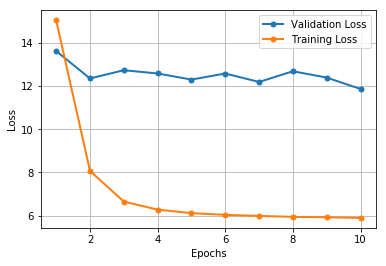

In [14]:
# Plotting our loss charts
import matplotlib.pyplot as plt

history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_loss_values, label='Validation Loss')
line2 = plt.plot(epochs, loss_values, label='Training Loss')
plt.setp(line1, linewidth=2.0, marker='.', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker='.', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

## 顯示 Accuracy 圖表

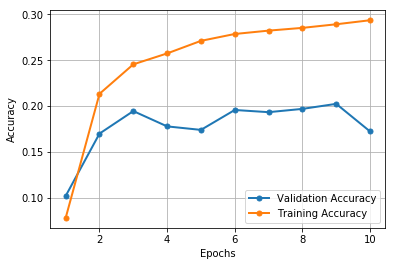

In [58]:
# Plotting our accuracy charts
import matplotlib.pyplot as plt

history_dict = history.history

acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_acc_values, label='Validation Accuracy')
line2 = plt.plot(epochs, acc_values, label='Training Accuracy')
plt.setp(line1, linewidth=2.0, marker = '.', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '.', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()

## 把 Model 存起來

In [ ]:
from datetime import datetime

model_name = 'model-{}.h5'.format(datetime.now().strftime('%Y%m%d%H%M%S'))

model.save(os.path.join(PROJECT_ROOT, model_name))
print(model_name + " Saved")

## 載入之前的 Model

In [59]:
from keras.models import load_model

model_name = 'model-20190606033519-ori-100.h5'

model = load_model(os.path.join(PROJECT_ROOT, model_name))
print(model_name + " Loaded")

model-20190606033519-ori-100.h5 Loaded


## 把 Multi-Hot_Encoding 轉換回驗證碼

In [26]:
def decode_captcha(data: np.ndarray) -> str:
    result = ''
    
    for i in range(4):
        try:
            index = list(data[26 * i:26 * (i + 1)]).index(1)
            result += chr(65 + index)
        except:
            pass

    return result

## 讓模型來辨識一下測試集裡的驗證碼

In [29]:
predictions = model.predict(x_test)

# 設置閥值
predictions[predictions < 0.5] = 0
predictions[predictions >= 0.5] = 1

prediction_captcha = []
for data in predictions:
    prediction_captcha.append(decode_captcha(data))

print(prediction_captcha)

['IMFK', 'IMVR', 'INBW', 'INFX', 'INKN', 'INNB', 'INNG', 'INQA', 'INRK', 'INVZ', 'INWV', 'INWW', 'INXQ', 'INIO', 'IOCN', 'IQEK', 'IOMT', 'IONT', 'IONV', 'IOZW', 'IPDK', 'IPIS', 'IPKZ', 'IPMI', 'IPPC', 'IPSA', 'IPTF', 'IPUC', 'IPVM', 'IQER', 'IQKO', 'IQNI', 'IQPS', 'IQPV', 'IRGI', 'IRJW', 'IRSB', 'IRSD', 'IRUX', 'IRYW', 'ISBA', 'ISHC', 'ISXX', 'IKD', 'ISN', 'ISPM', 'ISQX', 'ISSF', 'ISTT', 'ISW', 'ITBU', 'ITBV', 'ITEZ', 'ITFS', 'ITIG', 'ITIW', 'ITPI', 'ITQ', 'ITQU', 'ITWK', 'IUCZ', 'IUJX', 'IUWN', 'IUPE', 'IUPI', 'IUSH', 'IUTC', 'IUXR', 'IUO', 'IUZU', 'IVBB', 'IVBD', 'IVJB', 'IVMR', 'IVQS', 'IVSZ', 'IVXE', 'IWA', 'IWAW', 'IWBA', 'IWKJ', 'IWTO', 'IWTW', 'IWUP', 'IWWF', 'IWXJ', 'IXI', 'IXJK', 'IXNE', 'IXOC', 'IXPM', 'IXPV', 'IXWX', 'IXHH', 'IXIZ', 'IYAT', 'IYIY', 'IYJA', 'IYMP', 'IYRU', 'IYSD', 'IYSR', 'IYTR', 'IYXT', 'IZEP', 'IZIA', 'IZJO', 'IZMJ', 'IZQR', 'IZVR', 'IZXF', 'IZIT', 'JARW', 'JAEI', 'JAFI', 'JAMT', 'IAV', 'JARI', 'JASA', 'JBAO', 'JBBW', 'JBWS', 'JBXC', 'JBX', 'JBZJ', 'JCDH', 

## 拿出測試集裡的標籤

In [30]:
labels = y_test.values.astype(np.float32)

label_captcha = []
for data in labels:
    label_captcha.append(decode_captcha(data))

print(label_captcha)

['IMTQ', 'IMVR', 'INBW', 'INFX', 'INKN', 'INNB', 'INNG', 'INQA', 'INRH', 'INVZ', 'INWV', 'INWW', 'INXQ', 'INYO', 'IOCN', 'IOEK', 'IOMT', 'IONT', 'IOWV', 'IOZW', 'IPDX', 'IPIS', 'IPKZ', 'IPNI', 'IPPC', 'IPSA', 'IPTF', 'IPUG', 'IPVM', 'IQER', 'IQKO', 'IQNI', 'IQPS', 'IQPV', 'IRGI', 'IRJW', 'IRSB', 'IRSD', 'IRUX', 'IRYW', 'ISBA', 'ISHC', 'ISHX', 'ISKD', 'ISNX', 'ISPM', 'ISQX', 'ISSF', 'ISTT', 'ISWU', 'ITBU', 'ITBV', 'ITEZ', 'ITFS', 'ITIG', 'ITIW', 'ITPI', 'ITQB', 'ITQU', 'ITWK', 'IUCZ', 'IUJX', 'IUMW', 'IUPE', 'IUPI', 'IUSH', 'IUTC', 'IUXR', 'IUYO', 'IUZU', 'IVBB', 'IVBD', 'IVJB', 'IVMR', 'IVQS', 'IVSZ', 'IVXE', 'IWAG', 'IWAW', 'IWBA', 'IWKJ', 'IWTO', 'IWTW', 'IWUP', 'IWWF', 'IWXJ', 'IXHT', 'IXJK', 'IXNE', 'IXOC', 'IXPM', 'IXPV', 'IXWX', 'IXXH', 'IXYZ', 'IYAT', 'IYIY', 'IYJA', 'IYMP', 'IYRU', 'IYSD', 'IYSR', 'IYTR', 'IYXT', 'IZEP', 'IZIA', 'IZJO', 'IZMJ', 'IZQR', 'IZVR', 'IZXF', 'IZYT', 'JACW', 'JAEI', 'JAFI', 'JAMT', 'JAQV', 'JARI', 'JASA', 'JBAO', 'JBBW', 'JBWS', 'JBXC', 'JBXR', 'JBZJ',

## 計算辨識正確率

In [24]:
count = 0

for i in range(len(labels)):
    if (predictions[i] == labels[i]).all():
        count += 1

count / len(labels)

0.7504950495049505

## 隨意秀個圖片跟辨識結果

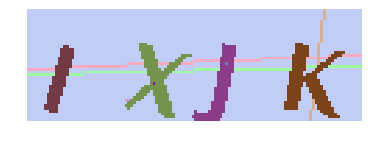

IXJK True


In [57]:
number = 87

plt.imshow(x_test[number])
plt.axis('off')
plt.show()

print(prediction_captcha[number], prediction_captcha[number] == label_captcha[number])